In [3]:
import pandas as pd

dataset = pd.read_csv("../files/input/auto_mpg.csv")
print(dataset.shape)
dataset.head()

(398, 8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
dataset = dataset.dropna()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
dataset.Origin.value_counts()

Origin
1    245
3     79
2     68
Name: count, dtype: int64

In [7]:
dataset["Origin"] = dataset["Origin"].map(
    {1: "USA", 2: "Europe", 3: "Japan"},
)

In [8]:
dataset = pd.get_dummies(dataset, columns=["Origin"], prefix="", prefix_sep="")
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [9]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

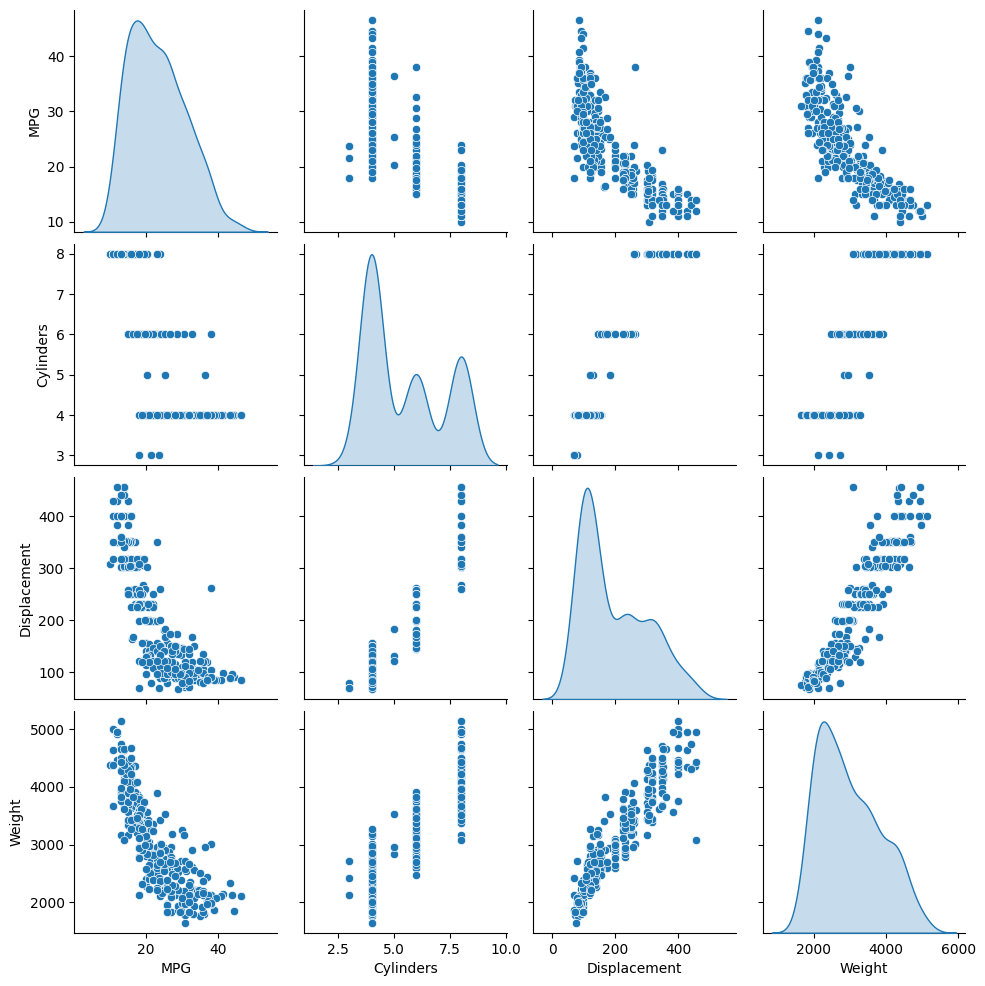

In [10]:
import seaborn as sns

sns.pairplot(
    train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [11]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [12]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [13]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop("MPG")
test_labels = test_features.pop("MPG")

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

pd.DataFrame(
    data=scaler.fit_transform(train_dataset),
    columns=train_dataset.columns,
).describe().transpose()[["mean", "std"]]

ImportError: DLL load failed while importing _fblas: %1 no es una aplicación Win32 válida.

In [16]:
horsepower_scaler = StandardScaler()

train_horsepower = train_features[["Horsepower"]]
test_horsepower = test_features[["Horsepower"]]

horsepower_scaler.fit(train_horsepower)

standarized_train_horsepower = horsepower_scaler.transform(train_horsepower)
standarized_test_horsepower = horsepower_scaler.transform(test_horsepower)

NameError: name 'StandardScaler' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression

horsepower_model = LinearRegression()
horsepower_model.fit(standarized_train_horsepower, train_labels)

In [ ]:
horsepower_model.intercept_

In [ ]:
horsepower_model.coef_

In [ ]:
import numpy as np

x = pd.DataFrame({"Horsepower": np.linspace(0, 250, 251)})
x.head()

In [ ]:
scaled_x = horsepower_scaler.transform(x)
y = horsepower_model.predict(scaled_x)
y[:5]

In [ ]:
import matplotlib.pyplot as plt


def plot_horsepower(x, y):
    plt.scatter(train_features["Horsepower"], train_labels, label="Data")
    plt.plot(x, y, color="k", label="Predictions")
    plt.xlabel("Horsepower")
    plt.ylabel("MPG")
    plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error

test_results = {}

y_pred = horsepower_model.predict(standarized_test_horsepower)

test_results["horsepower_model"] = mean_squared_error(
    y_true=test_labels,
    y_pred=y_pred,
)

test_results    